# Data Science And Business Analytics(GRIP June'21)

### Task 1: Prediction using Supervised ML
    (To predict the % of marks that a student is expected to score based upon the no. of hours he studied) 


### Author: Aditya Ranjan

##### Problem Statement: What will be predicted score if a student studies for 9.25hrs/day ? 
    
#### (1) Importing all required Libraries

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### (2) Importing dataset


In [3]:
data= pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print ("Data has been successfully imported")
data

Data has been successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Now we will look at some descriptive statistics of the dataset.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### (3) Data Processing

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

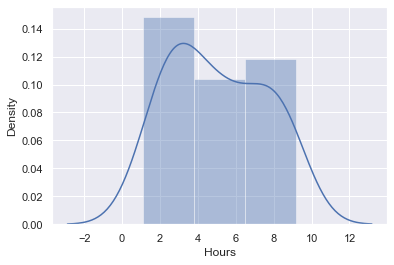

In [5]:
#to know about the outlier
sns.distplot(data["Hours"])

#### This shows that there does not exist outlier in tha data.

###### In my dataset, I have data of 25 students whose study hours along with their achieved scores are given. Now I will plot this dataset to get an idea about the realatinship between no of hours study and score obtained.



#### (4) Plotting the data

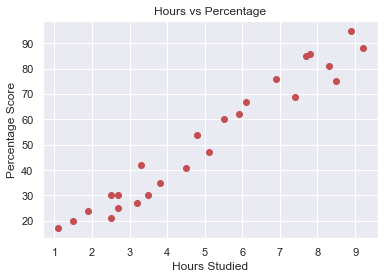

In [6]:
#using scatter plot
plt.scatter(x=data['Hours'],y=data['Scores'], color='r')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

##### we see here as the no of hours studied increases, the percentage of score also increases, i.e, there exist a positive relationship between these two variables. Therefore, we can run a linear regression model here.

In [7]:
#checking for missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Thus, we can see there is no missing values.

### (5) Specifying the Regression model

In [8]:
#Declaring dependent and independent variable
y = data["Scores"]
x1 = data["Hours"]

In [9]:
#Splitting dataset into training and testing data
y_train, y_test, x_train, x_test = train_test_split(y,x1, test_size= 0.2, random_state=42)

#Fitting the Linear regression model
x = sm.add_constant(x_train)
linear_regression_model = sm.OLS(y_train,x).fit()

In [10]:
# Summary of the regression
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     335.8
Date:                Sat, 12 Jun 2021   Prob (F-statistic):           4.34e-13
Time:                        23:23:48   Log-Likelihood:                -62.864
No. Observations:                  20   AIC:                             129.7
Df Residuals:                      18   BIC:                             131.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8269      2.935      0.963      0.348      -3.340       8.994
Hours          9.6821      0.528     18.324      0.000       8.572      10.792
==============================================================================
Omnibus:                        7.043   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                1.821
Skew:                          -0.134   Prob(JB):                        0.402
Kurtosis:                       1.546   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Analysing the p value we see that the hour spent on study is significant at any level of significance. Although the intercept term is insignificant but, we will keep this into model to avoid any functional form error.

### (6) Plotting the Regression Line 

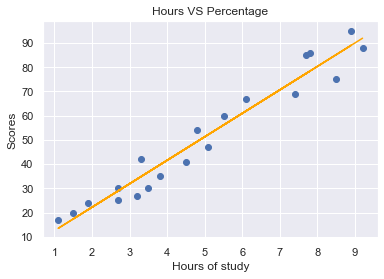

In [11]:
plt.scatter(x_train, y_train)
y_hat = x_train*9.6821 + 2.8269
plt.plot(x_train, y_hat, c="Orange")
plt.title('Hours VS Percentage')
plt.xlabel("Hours of study")
plt.ylabel("Scores")
plt.show()

#### Our regression line fits the data very well.

### (7) Testing of the Model

In [12]:
df = pd.DataFrame({'Constant': 1,'Hours of study': x_test})
prediction = linear_regression_model.predict(df)
Testing_results = pd.DataFrame({"Actual Score": y_test, "Predicted Score": prediction})
print("Testing Results")
Testing_results = Testing_results.reset_index(drop=True)
Testing_results

Testing Results


,Actual Score,Predicted Score
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


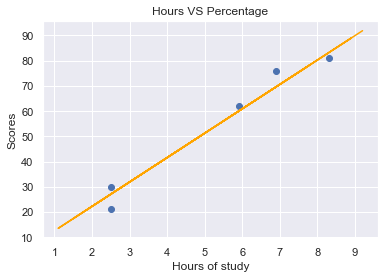

In [13]:
plt.scatter(x_test, y_test)
y_hat = x_train*9.6821 + 2.8269
plt.plot(x_train, y_hat, c="Orange")
plt.title('Hours VS Percentage')
plt.xlabel("Hours of study")
plt.ylabel("Scores")
plt.show()

#### This shows our model works well on testing data

### (8) Prediction

In [14]:
#predicting the score of a student who studies for 9.25 hrs/ day.
z = linear_regression_model.predict([1,9.25])
df =pd.DataFrame([9.25], columns=["Hours of study/day"])
df['Predicted score'] = z
df

,Hours of study/day,Predicted score
0,9.25,92.386115


#### The predicted score for a student who studies 9.25hrs/day is 92.38

### (9) Evaluating the  Accuracy of the Model

In [15]:
from sklearn.metrics import mean_squared_error
print('Mean squared error is:', mean_squared_error(prediction, y_test))

Mean squared error is: 18.943211722315247


##### So we have got R^2= 0.949, that indicates 94% variations in the percentage of scores are explained by the no of hours studied. 